# Ejemplo para demostrar Matrices de Confusión y curvas ROC

## Cargar dataset y revisarlo
Dataset https://archive.ics.uci.edu/dataset/267/banknote+authentication
Como es un .txt, le añadí una linea con los headers de las columnas

In [3]:
%pip install ydata_profiling

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [5]:
df = pd.read_csv('data_banknote_authentication.txt')
df.head(10)

,Variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.profile_report()

ModuleNotFoundError: No module named 'ipywidgets'

## Preparar datasets de entrenamiento y prueba

In [8]:
X = df.drop("class",axis=1)
X

,Variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [9]:
y = df["class"]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

Estandarizar datos

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X[:3]

array([[ 1.12180565,  1.14945512, -0.97597007,  0.35456135],
       [ 1.44706568,  1.06445293, -0.89503626, -0.12876744],
       [ 1.20780971, -0.77735215,  0.12221838,  0.61807317]])

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1097, 4)
(275, 4)


## Ajustar (Entrenar) Modelo

In [12]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### Regresion Logistica

In [13]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression()
lrc.fit(X_train,y_train)
y_pred = lrc.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       143
           1       0.98      0.99      0.98       132

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



#### Matriz de confusion usando Regresión Logística

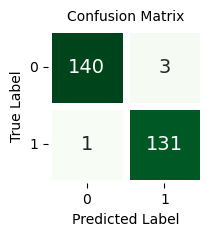

In [14]:
cm = confusion_matrix(y_test, y_pred)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(2,2))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 14})
plt.xlabel("Predicted Label")
plt.xticks(size = 10)
plt.yticks(size = 10, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 10)
plt.show()


#### ROC AUC

In [15]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [16]:
#Modelo tipo dummy que no clasifica nada bien (siempre dice 0)
dummyProbs = [0 for _ in range(len(y_test))]
#Probabilidades del modelo de RL
lrcProbs = lrc.predict_proba(X_test)
lrcProbs = lrcProbs[:,1] #Solamente analizar la clase True (1)

In [17]:
#Modelo tipo Dummy definido en Scikit
from sklearn.dummy import DummyClassifier
dummyClf = DummyClassifier(strategy="stratified")
dummyClf.fit(X_train,y_train)
y_predDummy = dummyClf.predict(X_test)

dummyClfProbs = dummyClf.predict_proba(X_test)
dummyClfProbs = dummyClfProbs[:,1]

In [18]:
#Calcular ROC AUC
dummyROC = roc_auc_score(y_test,dummyProbs)
lrcROC = roc_auc_score(y_test,lrcProbs)
dummyClfROC = roc_auc_score(y_test,dummyClfProbs)
print(f"Dummy ROC AUC: {dummyROC:.6f}")
print(f"LR ROC AUC: {lrcROC:.6f}")
print(f"Dummy CLF ROC AUC {dummyClfROC:.6f}")

Dummy ROC AUC: 0.500000
LR ROC AUC: 0.999735
Dummy CLF ROC AUC 0.485140


##### Graficar ROC AUC

In [19]:
#Calcular puntos curvas
dummyFP,dummyTP,dummyT = roc_curve(y_test,dummyProbs)
lrcFP,lrcTP,lrcT = roc_curve(y_test,lrcProbs)
dClfFP,dClfTP,dClfT = roc_curve(y_test,dummyClfProbs)

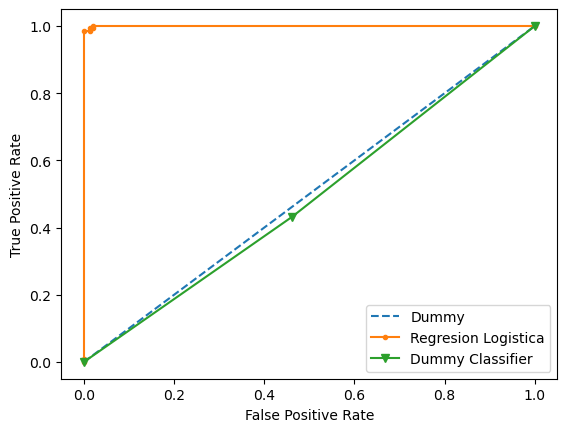

In [20]:
# graficar curvas
pyplot.plot(dummyFP, dummyTP, linestyle='--', label='Dummy')
pyplot.plot(lrcFP, lrcTP, marker='.', label='Regresion Logistica')
pyplot.plot(dClfFP,dClfTP,marker="v",label="Dummy Classifier")
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

##### Precision-Recall Curves

In [21]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

In [22]:
lrcPrecision,lrcRecall,lrcT = precision_recall_curve(y_test,lrcProbs)
lrcF1 = f1_score(y_test,y_pred)
lrcAUC = auc(lrcRecall,lrcPrecision)

dClfP,dClfR,dClfT = precision_recall_curve(y_test,dummyClfProbs)
dClfF1 = f1_score(y_test,y_predDummy)
dClfAUC = auc(dClfR,dClfP)

print(f"LR f1: {lrcF1:.6f}, AUC: {lrcAUC:.6f}")
print(f"Dummy f1: {dClfF1:.6f}, Dummy AUC: {dClfAUC:.6f}")

LR f1: 0.984962, AUC: 0.999717
Dummy f1: 0.456693, Dummy AUC: 0.583980


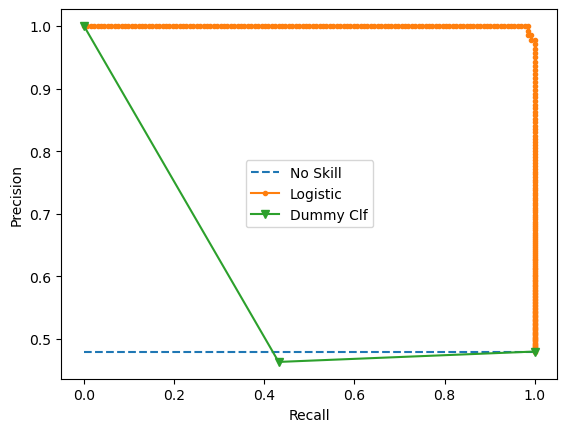

In [23]:
# plot the precision-recall curves
dummy = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [dummy, dummy], linestyle='--', label='No Skill')
pyplot.plot(lrcRecall, lrcPrecision, marker='.', label='Logistic')
pyplot.plot(dClfR,dClfP,marker="v",label="Dummy Clf")
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()